In [1]:
import os
import numpy as np
import PIL.Image as pil 
import matplotlib.pyplot as plt

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

from utils import mean_IU, mean_precision

import pandas as pd

from multiprocessing import Pool

In [3]:
img_folders = set(os.listdir('imgs'))
mask_folders = set(os.listdir('sfm_depths'))
img_folders.difference(mask_folders)

FileNotFoundError: [Errno 2] No such file or directory: 'imgs'

In [42]:
missing_items = {}
for folder in os.listdir('imgs'):
    if not os.path.isdir(os.path.join('imgs',folder)):
        continue
    img_filenames = set([os.path.splitext(fn)[0] for fn in os.listdir(os.path.join('imgs', folder))])
    mask_filenames = set([os.path.splitext(fn)[0] for fn in os.listdir(os.path.join('scaled_sfm_depths', folder))])
    missing_items[folder] = img_filenames.difference(mask_filenames)

In [43]:
missing_items.keys()

dict_keys(['scene0016_02', 'scene0036_01', 'scene0044_01', 'scene0034_01', 'scene0024_01', 'scene0003_01', 'scene0059_00', 'scene0021_00', 'scene0002_00', 'scene0034_02', 'scene0056_00', 'scene0012_01', 'scene0005_01', 'scene0046_01', 'scene0030_00', 'scene0058_01', 'scene0040_01', 'scene0007_00', 'scene0048_00', 'scene0028_00', 'scene0048_01', 'scene0000_02', 'scene0013_01', 'scene0047_00', 'scene0027_00', 'scene0032_00', 'scene0004_00', 'scene0010_00', 'scene0035_01', 'scene0038_00', 'scene0020_01', 'scene0022_01', 'scene0001_00', 'scene0018_00', 'scene0003_02', 'scene0003_00', 'scene0025_01', 'scene0057_01', 'scene0014_00', 'scene0017_01', 'scene0042_02', 'scene0024_00', 'scene0027_01', 'scene0002_01', 'scene0043_01', 'scene0030_01', 'scene0006_01', 'scene0056_01', 'scene0016_00', 'scene0000_00', 'scene0043_00', 'scene0042_00', 'scene0005_00', 'scene0017_00', 'scene0055_01', 'scene0041_00', 'scene0015_00', 'scene0050_00', 'scene0055_00', 'scene0037_00', 'scene0000_01', 'scene0055_02

In [39]:
with open('/scratch/shantanu/monodepth2/splits/scannet_full/val_files.txt', 'r') as f:
    filepaths = f.readlines()
    
val_files = set([filepath.split()[0] for filepath in filepaths])

print(set(missing_items.keys()).intersection(val_files))

{'scene0038_01', 'scene0024_01', 'scene0006_01', 'scene0038_00', 'scene0047_00', 'scene0032_00', 'scene0029_01', 'scene0032_01', 'scene0018_00', 'scene0024_02', 'scene0033_00', 'scene0046_01', 'scene0006_00', 'scene0029_00', 'scene0057_00', 'scene0014_00', 'scene0006_02', 'scene0009_01', 'scene0042_00', 'scene0009_00', 'scene0009_02', 'scene0024_00', 'scene0057_01', 'scene0040_00', 'scene0040_01', 'scene0013_01', 'scene0046_00', 'scene0053_00', 'scene0013_00', 'scene0013_02', 'scene0038_02', 'scene0029_02', 'scene0015_00', 'scene0042_02', 'scene0026_00', 'scene0042_01', 'scene0046_02'}


In [40]:
file_content = []
for folder in missing_items.keys():
    for fileidx in missing_items[folder]:
        if os.path.isfile(os.path.join('imgs', folder, '{}.png'.format(fileidx))):
            file_content.append('{} {}\n'.format(folder, fileidx))

with open('/scratch/shantanu/missing_files.txt', 'w') as f:
    f.writelines(file_content)

In [44]:
missing_items

{'scene0016_02': set(),
 'scene0036_01': set(),
 'scene0044_01': set(),
 'scene0034_01': set(),
 'scene0024_01': set(),
 'scene0003_01': set(),
 'scene0059_00': set(),
 'scene0021_00': set(),
 'scene0002_00': set(),
 'scene0034_02': set(),
 'scene0056_00': set(),
 'scene0012_01': set(),
 'scene0005_01': set(),
 'scene0046_01': set(),
 'scene0030_00': set(),
 'scene0058_01': set(),
 'scene0040_01': set(),
 'scene0007_00': set(),
 'scene0048_00': set(),
 'scene0028_00': set(),
 'scene0048_01': set(),
 'scene0000_02': set(),
 'scene0013_01': set(),
 'scene0047_00': set(),
 'scene0027_00': set(),
 'scene0032_00': set(),
 'scene0004_00': set(),
 'scene0010_00': set(),
 'scene0035_01': set(),
 'scene0038_00': set(),
 'scene0020_01': set(),
 'scene0022_01': set(),
 'scene0001_00': set(),
 'scene0018_00': set(),
 'scene0003_02': set(),
 'scene0003_00': set(),
 'scene0025_01': set(),
 'scene0057_01': set(),
 'scene0014_00': set(),
 'scene0017_01': set(),
 'scene0042_02': set(),
 'scene0024_00':

In [6]:
os.listdir('depths/scene0016_02')

['167.npy',
 '83.npy',
 '48.npy',
 '24.npy',
 '44.npy',
 '115.npy',
 '173.npy',
 '144.npy',
 '77.npy',
 '54.npy',
 '76.npy',
 '10.npy',
 '133.npy',
 '166.npy',
 '88.npy',
 '94.npy',
 '176.npy',
 '16.npy',
 '52.npy',
 '5.npy',
 '46.npy',
 '22.npy',
 '185.npy',
 '58.npy',
 '39.npy',
 '146.npy',
 '57.npy',
 '18.npy',
 '142.npy',
 '175.npy',
 '20.npy',
 '122.npy',
 '171.npy',
 '30.npy',
 '99.npy',
 '187.npy',
 '127.npy',
 '134.npy',
 '36.npy',
 '157.npy',
 '43.npy',
 '90.npy',
 '34.npy',
 '152.npy',
 '150.npy',
 '130.npy',
 '82.npy',
 '138.npy',
 '170.npy',
 '137.npy',
 '180.npy',
 '103.npy',
 '181.npy',
 '33.npy',
 '4.npy',
 '53.npy',
 '184.npy',
 '6.npy',
 '84.npy',
 '123.npy',
 '73.npy',
 '87.npy',
 '2.npy',
 '78.npy',
 '132.npy',
 '69.npy',
 '100.npy',
 '179.npy',
 '118.npy',
 '113.npy',
 '174.npy',
 '140.npy',
 '158.npy',
 '154.npy',
 '121.npy',
 '168.npy',
 '131.npy',
 '160.npy',
 '31.npy',
 '55.npy',
 '156.npy',
 '125.npy',
 '124.npy',
 '136.npy',
 '80.npy',
 '109.npy',
 '41.npy',
 

In [28]:
rgb = pil.open('imgs/scene0016_02/90.png')
gt_depth = np.load('depths/scene0016_02/90.npy')
pred_depth = np.load('sfm_depths/scene0016_02/90.npy')

In [29]:
np.percentile(gt_depth, [0, 10, 90, 100])

array([   0.,  890., 2422., 3665.])

In [30]:
np.percentile(pred_depth, [0, 10, 90, 100])

array([0.4409112 , 0.50563095, 0.91501091, 1.1141876 ])

In [31]:
scaled_pred_depth = np.median(gt_depth) * pred_depth / np.median(pred_depth)
np.percentile(scaled_pred_depth, [0, 10, 90, 100])

array([ 961.29022217, 1102.39445801, 1994.93930664, 2429.19116211])

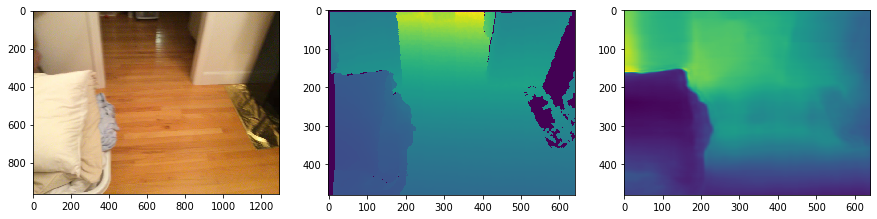

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

axes[0].imshow(rgb)
axes[1].imshow(gt_depth)
axes[2].imshow(scaled_pred_depth)
plt.show()

In [20]:
os.listdir('scaled_sfm_depths')

['scene0016_02',
 'scene0036_01',
 'scene0044_01',
 'scene0034_01',
 'scene0024_01',
 'scene0003_01',
 'scene0059_00',
 'scene0021_00',
 'scene0002_00',
 'scene0034_02',
 'scene0056_00',
 'scene0012_01',
 'scene0005_01',
 'scene0046_01',
 'scene0030_00',
 'scene0058_01',
 'scene0040_01',
 'scene0007_00',
 'scene0048_00',
 'scene0028_00',
 'scene0048_01',
 'scene0000_02',
 'scene0013_01',
 'scene0047_00',
 'scene0027_00',
 'scene0032_00',
 'scene0004_00',
 'scene0010_00',
 'scene0035_01',
 'scene0038_00',
 'scene0020_01',
 'scene0022_01',
 'scene0001_00',
 'scene0018_00',
 'scene0003_02',
 'scene0003_00',
 'scene0025_01',
 'scene0057_01',
 'scene0014_00',
 'scene0017_01',
 'scene0042_02',
 'scene0024_00',
 'scene0027_01',
 't.tar.gz',
 'scene0002_01',
 'scene0043_01',
 'scene0030_01',
 'scene0006_01',
 'scene0056_01',
 'scene0016_00',
 'scene0000_00',
 'scene0043_00',
 'scene0042_00',
 'scene0005_00',
 'scene0017_00',
 'scene0055_01',
 'scene0041_00',
 'scene0015_00',
 'scene0050_00',
 

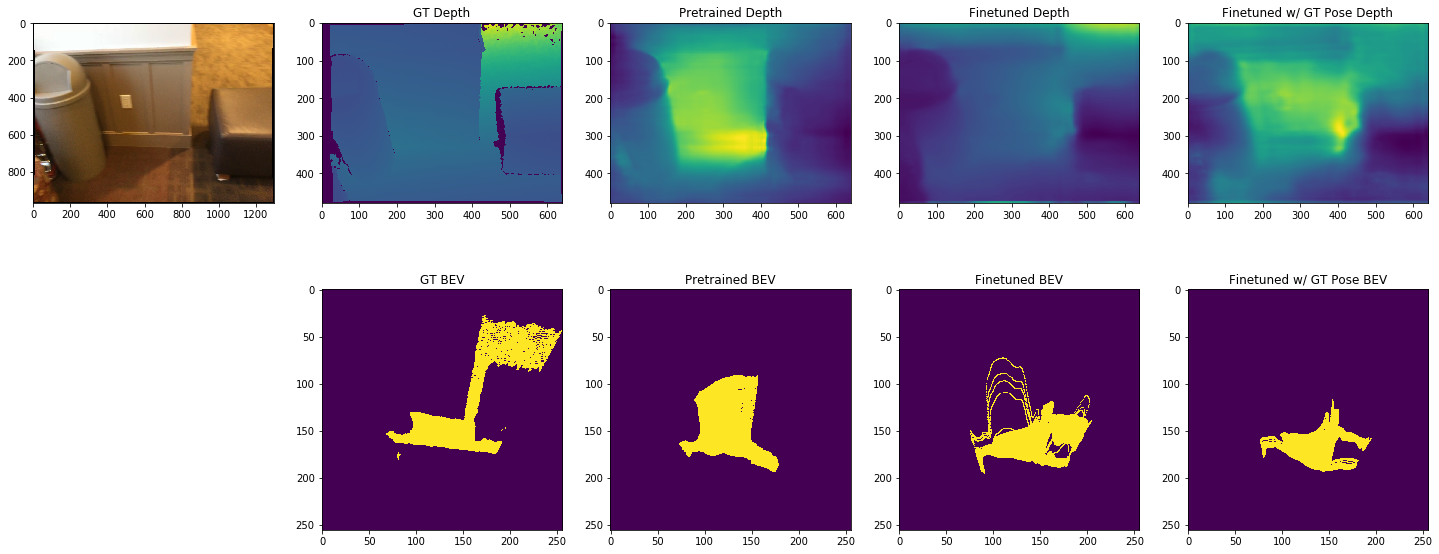

In [13]:
folder = 'scene0036_01'
filename = '90.png'

def plot_maps(folder, filename, text=None):
    fileidx = os.path.splitext(filename)[0]
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

    rgb = pil.open('imgs/{}/{}.png'.format(folder, fileidx))
    gt_depth = np.load('depths/{}/{}.npy'.format(folder, fileidx))
    pred_pretrained_depth = np.load('scaled_sfm_depths/{}/{}.npy'.format(folder, fileidx))
    pred_finetuned_depth = np.load('finetuned_pred_depth/{}/{}.npy'.format(folder, fileidx))
    pred_gtpose_depth = np.load('pred_depths_gtpose/{}/{}.npy'.format(folder, fileidx))
    
    gt_bev = pil.open('bev/{}/{}.png'.format(folder, fileidx))
    pred_pretrained_bev = pil.open('pred_depth_bev/{}/{}.png'.format(folder, fileidx))
    pred_finetuned_bev = pil.open('finetuned_depth_bev/{}/{}.png'.format(folder, fileidx))
    pred_gtpose_bev = pil.open('depth_gtpose_bev/{}/{}.png'.format(folder, fileidx))

    axes[0][0].imshow(rgb)
    
    axes[0][1].imshow(gt_depth)
    axes[0][1].set_title('GT Depth')
    axes[0][2].imshow(pred_pretrained_depth)
    axes[0][2].set_title('Pretrained Depth')
    axes[0][3].imshow(pred_finetuned_depth)
    axes[0][3].set_title('Finetuned Depth')
    axes[0][4].imshow(pred_gtpose_depth)
    axes[0][4].set_title('Finetuned w/ GT Pose Depth')
    
    axes[1][1].imshow(gt_bev)
    axes[1][1].set_title('GT BEV')
    axes[1][2].imshow(pred_pretrained_bev)
    axes[1][2].set_title('Pretrained BEV')
    axes[1][3].imshow(pred_finetuned_bev)
    axes[1][3].set_title('Finetuned BEV')
    axes[1][4].imshow(pred_gtpose_bev)
    axes[1][4].set_title('Finetuned w/ GT Pose BEV')

    if text is None:
        fig.delaxes(axes[1][0])
    else:
        axes[1][0].text(0.1, 0.1, text, fontsize=12)
    
plot_maps(folder, filename)
plt.show()

In [95]:
ssim(gt_depth.astype(np.float32), pred_depth)

0.27785121329598766

In [30]:
mean_squared_error(gt_depth.astype(np.float32), pred_depth)

764090.7723700244

In [5]:
def compute_errors(gt, pred):
    """Computation of error metrics between predicted and ground truth depths
    """
    thresh = np.maximum((gt / pred), (pred / gt))
    a1 = (thresh < 1.25     ).mean()
    a2 = (thresh < 1.25 ** 2).mean()
    a3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())
    lg10 = np.mean(np.abs((np.log10(gt) - np.log10(pred))))

    abs_rel = np.mean(np.abs(gt - pred) / gt)

    sq_rel = np.mean(((gt - pred) ** 2) / gt)
    ssim_score = ssim(gt_depth, pred_pretrained_depth)
    
    mse_score = mse(gt_depth, pred_pretrained_depth)

    return abs_rel, sq_rel, rmse, rmse_log, lg10, a1, a2, a3, ssim_score, mse_score


def get_score(x):
    folder, filename = x.split()
    fileidx = os.path.splitext(filename)[0]
#     rgb = pil.open('imgs/{}/{}.png'.format(folder, fileidx))
    
    gt_depth = np.load('depths/{}/{}.npy'.format(folder, fileidx)).astype(np.float32)
    pred_pretrained_depth = np.load('scaled_sfm_depths/{}/{}.npy'.format(folder, fileidx))
    pred_finetuned_depth = np.load('finetuned_pred_depth/{}/{}.npy'.format(folder, fileidx))
    pred_gtpose_depth = np.load('pred_depths_gtpose/{}/{}.npy'.format(folder, fileidx))
    
    gt_bev = np.array(pil.open('bev/{}/{}.png'.format(folder, fileidx)))
    pred_pretrained_bev = np.array(pil.open('pred_depth_bev/{}/{}.png'.format(folder, fileidx)))
    pred_finetuned_bev = np.array(pil.open('finetuned_depth_bev/{}/{}.png'.format(folder, fileidx)))
    pred_gtpose_bev = np.array(pil.open('depth_gtpose_bev/{}/{}.png'.format(folder, fileidx)))
    
    bev_occ_prop = np.nonzero(gt_bev)[0].shape[0] / (np.array(gt_bev).size)
    
    return (x, bev_occ_prop,
            *compute_errors(gt_depth, pred_pretrained_depth),
            *compute_errors(gt_depth, pred_finetuned_depth),
            *compute_errors(gt_depth, pred_gtpose_depth), 
            ssim(gt_bev, pred_pretrained_bev), mse(gt_bev, pred_pretrained_bev), mean_IU(gt_bev, pred_pretrained_bev),
            ssim(gt_bev, pred_finetuned_bev), mse(gt_bev, pred_finetuned_bev), mean_IU(gt_bev, pred_finetuned_bev),
           ssim(gt_bev, pred_gtpose_bev), mse(gt_bev, pred_gtpose_bev), mean_IU(gt_bev, pred_gtpose_bev))

# scores = [('{} {}'.format(folder, filename), *get_score(folder, filename)) for folder in os.listdir('depths')
#          for filename in os.listdir('depths/{}'.format(folder))]

with Pool(12) as p:
    args = ['{} {}'.format(folder, filename) for folder in os.listdir('imgs') 
            for filename in os.listdir('imgs/{}'.format(folder))]
    scores = p.map(get_score, args)

np.save('pred_vs_gt_depth_scores.npy', scores)

In [58]:
scores = np.load('pred_vs_gt_depth_scores.npy', allow_pickle=True)
len(scores)

48359

In [59]:
scores[3]

array(['scene0016_02 121.png', 0.0, 0.13078191924270904,
       1543808.1426984295, 0.17329527900020186, 1102004.0010501388,
       0.2009000004711884, 1072373.4219921252, 1.0, 0.0, list([1.0]), 1.0,
       0.0, list([1.0]), 1.0, 0.0, list([1.0])], dtype=object)

In [60]:
for i in range(len(scores)):
    scores[i][16] = scores[i][16][-1]
    scores[i][13] = scores[i][13][-1]
    scores[i][10] = scores[i][10][-1]

In [61]:
numeric_columns = []
for suffix in ['pretrained_depth','finetuned_depth', 'gtpose_depth']:
    for prefix in ['a1', 'a2', 'a3', 'rmse', 'rmse_log', 'lg10', 'abs_rel', 'sq_rel', 'ssim', 'mse']:
        numeric_columns.append(prefix + '_'  + suffix)
        
for suffix in ['pretrained_bev','finetuned_bev', 'gtpose_bev']:
    for prefix in ['ssim', 'mse', 'mIOU']:
        numeric_columns.append(prefix + '_'  + suffix)
        

df = pd.DataFrame(scores, columns=['file', 'bev_occ_prop', *numeric_columns])

# df = pd.DataFrame(scores, columns=['file', 'bev_occ_prop', 'ssim_pretrained_depth', 'mse_pretrained_depth',
#                                    'ssim_finetuned_depth', 'mse_finetuned_depth',
#                                    'ssim_gtpose_depth', 'mse_gtpose_depth',
#                                    'ssim_pretrained_bev', 'mse_pretrained_bev', 'mIOU_pretrained',
#                                   'ssim_finetuned_bev', 'mse_finetuned_bev', 'mIOU_finetuned',
#                                   'ssim_gtpose_bev', 'mse_gtpose_bev', 'mIOU_gtpose'])

df.head()

,file,bev_occ_prop,ssim_pretrained_depth,mse_pretrained_depth,ssim_finetuned_depth,mse_finetuned_depth,ssim_gtpose_depth,mse_gtpose_depth,ssim_pretrained_bev,mse_pretrained_bev,mIOU_pretrained,ssim_finetuned_bev,mse_finetuned_bev,mIOU_finetuned,ssim_gtpose_bev,mse_gtpose_bev,mIOU_gtpose
0,scene0016_02 57.png,0.018692,0.13014,401431,0.123233,401513,0.134929,391840,0.925497,2249.32,0.0754486,0.931012,2205.67,0.0207048,0.948286,1371.22,0.267232
1,scene0016_02 51.png,0.0126343,0.135737,421750,0.13467,412806,0.117136,404624,0.949519,1451.59,0.031767,0.953628,1378.17,0.0035868,0.949158,1458.54,0.00067981
2,scene0016_02 93.png,0.126694,0.183877,440727,0.367597,406472,0.392141,345648,0.853988,4532.38,0.493458,0.843959,4076.96,0.632337,0.851749,3616.58,0.650259
3,scene0016_02 121.png,0,0.130782,1.54381e+06,0.173295,1.102e+06,0.2009,1.07237e+06,1,0,1,1,0,1,1,0,1
4,scene0016_02 48.png,0.00967407,0.134296,453559,0.129839,452065,0.134268,452647,0.960216,1126.15,0,0.958537,1298.79,0.0541908,0.963487,1126.15,0.0240757


In [62]:
# df['bev_occ_prop'] = df['bev_occ_prop'].astype(np.float)
# df['ssim_pretrained_depth'] = df['ssim_pretrained_depth'].astype(np.float)
# df['mse_pretrained_depth'] = df['mse_pretrained_depth'].astype(np.float)
# df['ssim_finetuned_depth'] = df['ssim_finetuned_depth'].astype(np.float)
# df['mse_finetuned_depth'] = df['mse_finetuned_depth'].astype(np.float)
# df['ssim_gtpose_depth'] = df['ssim_gtpose_depth'].astype(np.float)
# df['mse_gtpose_depth'] = df['mse_gtpose_depth'].astype(np.float)

# df['ssim_pretrained_bev'] = df['ssim_pretrained_bev'].astype(np.float)
# df['mse_pretrained_bev'] = df['mse_pretrained_bev'].astype(np.float)
# df['mIOU_pretrained'] = df['mIOU_pretrained'].astype(np.float)
# df['ssim_finetuned_bev'] = df['ssim_finetuned_bev'].astype(np.float)
# df['mse_finetuned_bev'] = df['mse_finetuned_bev'].astype(np.float)
# df['mIOU_finetuned'] = df['mIOU_finetuned'].astype(np.float)
# df['ssim_gtpose_bev'] = df['ssim_gtpose_bev'].astype(np.float)
# df['mse_gtpose_bev'] = df['mse_gtpose_bev'].astype(np.float)
# df['mIOU_gtpose'] = df['mIOU_gtpose'].astype(np.float)

for col in numeric_columns:
    df[col] = df[col].astype(np.float32)

df.describe()

,bev_occ_prop,ssim_pretrained_depth,mse_pretrained_depth,ssim_finetuned_depth,mse_finetuned_depth,ssim_gtpose_depth,mse_gtpose_depth,ssim_pretrained_bev,mse_pretrained_bev,mIOU_pretrained,ssim_finetuned_bev,mse_finetuned_bev,mIOU_finetuned,ssim_gtpose_bev,mse_gtpose_bev,mIOU_gtpose
count,48359.000000,48359.000000,4.835900e+04,48359.000000,4.835900e+04,48359.000000,4.835900e+04,48359.000000,48359.000000,48359.000000,48359.000000,48359.000000,48359.000000,48359.000000,48359.000000,48359.000000
mean,0.072200,0.201635,5.982102e+05,0.223258,6.218597e+05,0.228843,5.738127e+05,0.875485,3746.841496,0.426310,0.853365,3800.100086,0.439608,0.876254,3654.146812,0.448244
std,0.072399,0.105459,5.736778e+05,0.125573,5.880664e+05,0.113787,5.919031e+05,0.103438,3285.932878,0.320385,0.116913,3266.019251,0.314224,0.105279,3322.337038,0.317066
min,0.000000,-0.237665,2.641722e+04,-0.453137,2.527272e+04,-0.149331,2.441585e+04,0.472942,0.000000,0.000000,0.471409,0.000000,0.000000,0.462919,0.000000,0.000000
25%,0.009117,0.127347,2.363122e+05,0.138733,2.452788e+05,0.147047,2.092121e+05,0.808915,895.462990,0.169800,0.764869,976.327515,0.196524,0.811213,896.951294,0.199300
50%,0.054306,0.201953,4.172858e+05,0.227592,4.429341e+05,0.227121,3.825687e+05,0.890653,3300.066376,0.393098,0.866414,3408.216476,0.406894,0.894705,3050.031281,0.415949
75%,0.112457,0.274292,7.531726e+05,0.312930,7.752261e+05,0.309020,7.063572e+05,0.962964,5632.735062,0.592102,0.957909,5698.220444,0.600949,0.962466,5473.982620,0.634103
max,0.462387,0.609295,7.399337e+06,0.640615,7.288648e+06,0.601419,9.390625e+06,1.000000,20609.043503,1.000000,1.000000,21722.294998,1.000000,1.000000,23683.879852,1.000000


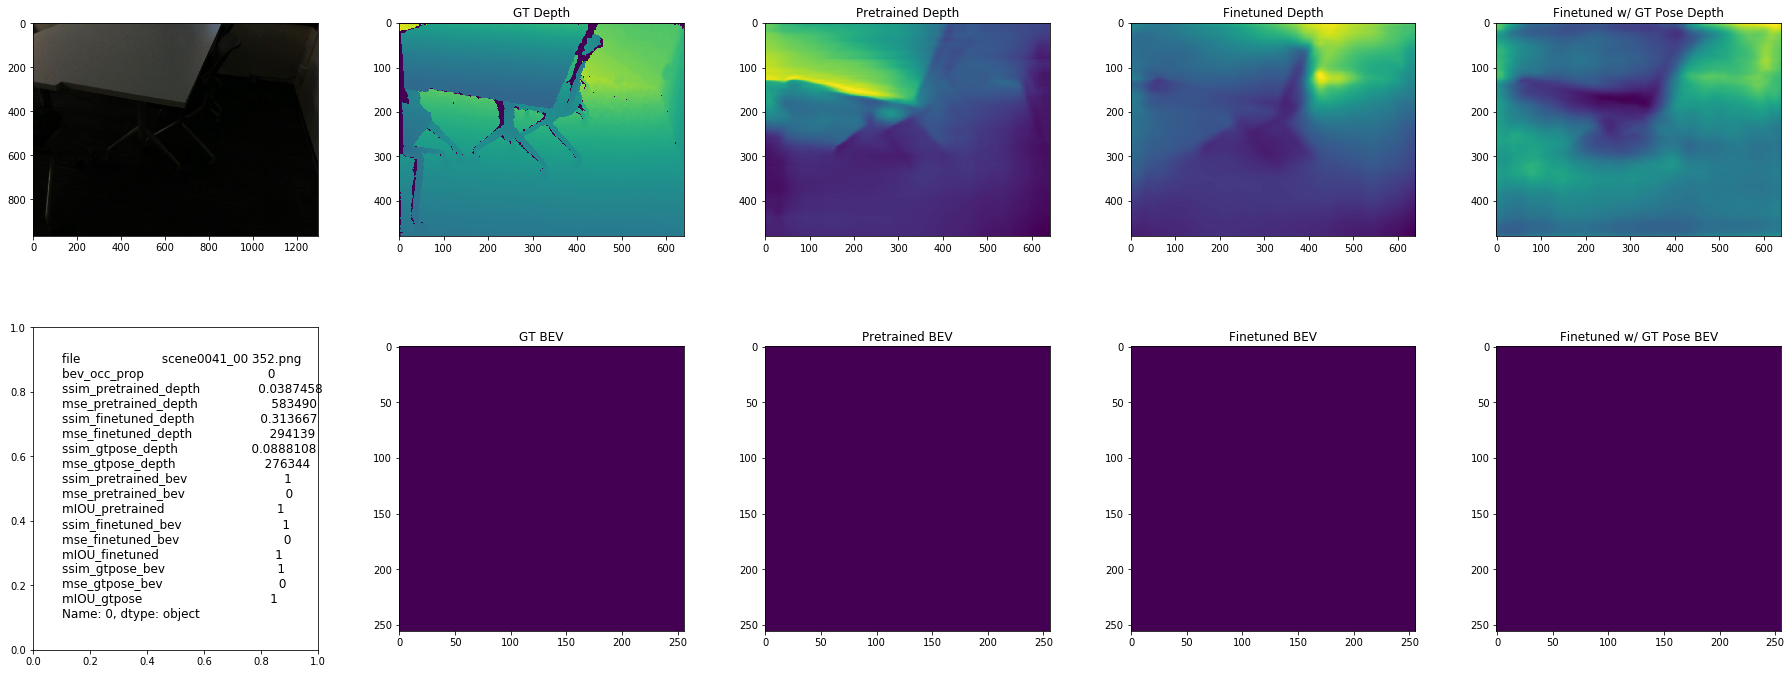

In [14]:
df.sort_values(by='mIOU_finetuned', inplace=True, ascending=False)
df.reset_index(drop=True, inplace=True)
idx = 0
plot_maps(*df['file'][idx].split(), text=str(df.iloc[idx]))
plt.tight_layout()
plt.show()

(14314, 17)


/home/shantanusingh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


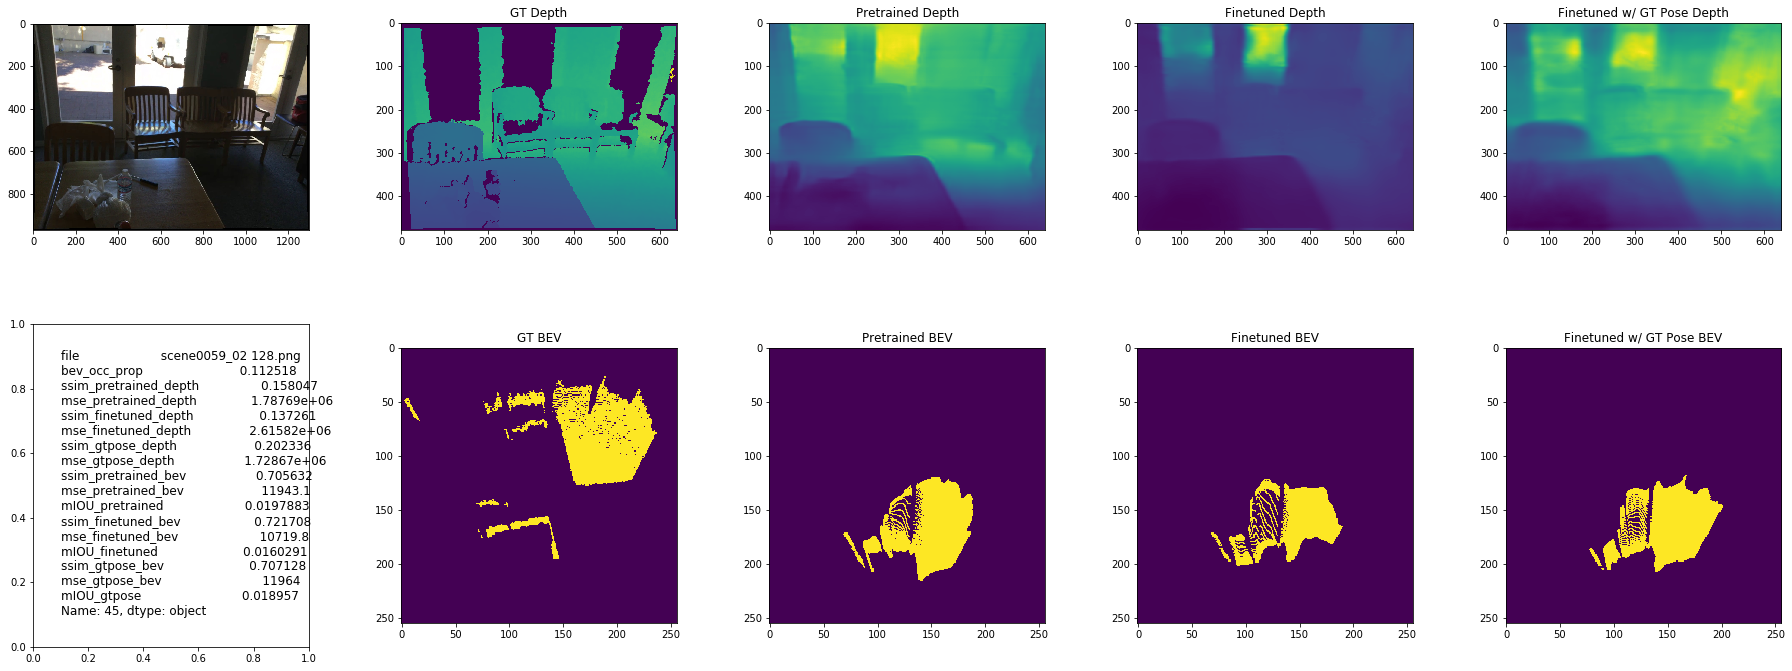

In [15]:
df_filtered = df[df.bev_occ_prop > 0.1]
print(df_filtered.shape)
df_filtered.sort_values(by=['mIOU_pretrained'], inplace=True, 
                        ascending=[True])
df_filtered.reset_index(drop=True, inplace=True)
idx = 45
plot_maps(*df_filtered['file'][idx].split(), text=str(df_filtered.iloc[idx]))
plt.tight_layout()
plt.show()

In [47]:
df_reorderd = df[['file', 'ssim_pretrained_depth', 'ssim_finetuned_depth', 'ssim_gtpose_depth',
                 'mse_pretrained_depth', 'mse_finetuned_depth', 'mse_gtpose_depth',
                  'ssim_pretrained_bev', 'ssim_finetuned_bev', 'ssim_gtpose_bev',
                 'mse_pretrained_bev', 'mse_finetuned_bev', 'mse_gtpose_bev',
                 'mIOU_pretrained', 'mIOU_finetuned', 'mIOU_gtpose']]
df_reorderd.to_csv('scores_df.csv', index=False)

In [17]:
df_reorderd.describe().to_csv('scores_df.csv')

In [63]:
df_filtered = df[df.bev_occ_prop > 0.1]
df_reorderd = df_filtered[['file', 'ssim_pretrained_depth', 'ssim_finetuned_depth', 'ssim_gtpose_depth',
                 'mse_pretrained_depth', 'mse_finetuned_depth', 'mse_gtpose_depth',
                  'ssim_pretrained_bev', 'ssim_finetuned_bev', 'ssim_gtpose_bev',
                 'mse_pretrained_bev', 'mse_finetuned_bev', 'mse_gtpose_bev',
                 'mIOU_pretrained', 'mIOU_finetuned', 'mIOU_gtpose']]

val_split_path = '../../Indoor-SfMLearner/splits/scannet_test_depth.txt'
with open(val_split_path, 'r') as f:
    val_files = f.readlines()
    
val_file_indices = ['{} {}'.format(os.path.basename(os.path.dirname(f.split()[0])), 
                                   os.path.basename(f.split()[0])) for f in val_files]

df_reorderd['validation'] = df_reorderd['file'].isin(val_file_indices)

# validation scores
df_reorderd[df_reorderd['validation'] ==  True].describe().to_csv('val_scores.csv')

# training scores
df_reorderd[df_reorderd['validation'] == False].describe().to_csv('train_scores.csv')

/home/shantanusingh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


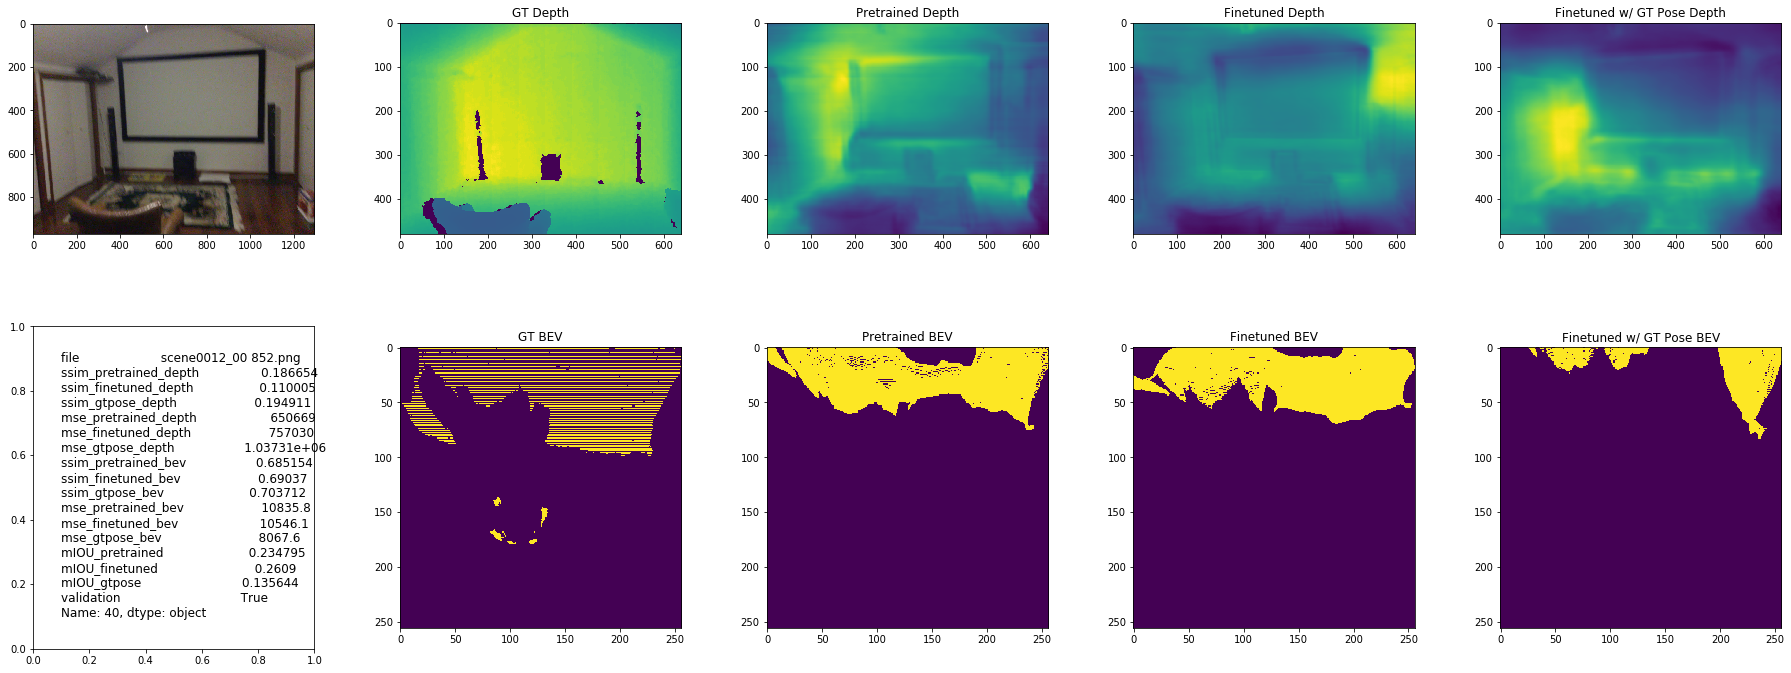

In [94]:
df_filtered = df_reorderd[df_reorderd['validation'] == True]
df_filtered.sort_values(by=['ssim_finetuned_depth'], inplace=True, 
                        ascending=[True])
df_filtered.reset_index(drop=True, inplace=True)
idx = 40
plot_maps(*df_filtered['file'][idx].split(), text=str(df_filtered.iloc[idx]))
plt.tight_layout()
plt.show()

## Remove rows from training data that have nan or inf in the poses

In [2]:
import shutil

# tgt_dir = '/scratch/shantanu/scannet_invalid_pose'

invalid_files = set()

for folder in os.listdir('poses'):
    for filename in os.listdir(os.path.join('poses', folder)):
        pose = np.loadtxt(os.path.join('poses', folder, filename)).astype(np.float32)
        if np.any(np.isnan(pose) | np.isinf(pose)):
            fileidx = int(os.path.splitext(os.path.basename(filename))[0])
            invalid_files.add((folder, fileidx))
#             os.makedirs(os.path.join(tgt_dir, folder), exist_ok=True)
#             for i in [-1, 0, 1]:
#                 src_path = os.path.join('imgs', folder, '{}.png'.format(fileidx + i))
#                 if os.path.exists(src_path):
#                     shutil.copy(src_path, os.path.join(tgt_dir, folder, '{}.png'.format(fileidx + i)))
    

In [3]:
train_split_path = '/scratch/shantanu/Indoor-SfMLearner/splits/scannet_train_depth.txt.bak'

with open(train_split_path, 'r') as f:
    train_data = f.readlines()
    
invalid_row_indices = set()
for idx, row in enumerate(train_data):
    row_files = [(os.path.basename(os.path.dirname(f)), 
                  int(os.path.splitext(os.path.basename(f))[0])) for f in row.split()]
    for item in row_files:
        if item in invalid_files:
            invalid_row_indices.add(idx)
            break
            
valid_row_indices = list(set(range(len(train_data))).difference(invalid_row_indices))    
sorted(valid_row_indices)

train_split_path = '/scratch/shantanu/Indoor-SfMLearner/splits/scannet_train_depth.txt'

with open(train_split_path, 'w') as f:
    for idx in valid_row_indices:
        f.write(train_data[idx])

In [33]:
valid_row_indices = list(set(range(len(train_data))).difference(invalid_row_indices))
train_data[valid_row_indices[0]]

'imgs/scene0049_00/4.png imgs/scene0049_00/0.png imgs/scene0049_00/1.png imgs/scene0049_00/2.png imgs/scene0049_00/3.png imgs/scene0049_00/5.png imgs/scene0049_00/6.png imgs/scene0049_00/7.png imgs/scene0049_00/8.png\n'

In [31]:
train_data

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Debug nan or inf in depth pred

In [5]:
data_dir = '/scratch/shantanu/Indoor-SfMLearner/models/scannet_w_gtpose/data'

os.listdir(data_dir)

# sorted([int(os.path.splitext(f.replace('rgb_', ''))[0]) for f in os.listdir(data_dir) if 'rgb_' in f])

['depth.npy', 'inv_K.npy', 'cam_points.npy', '0.npy']

In [11]:
for f in os.listdir(data_dir):
    if np.any(np.isinf(np.load(os.path.join(data_dir, f)))):
        print(f)

In [7]:
depth = np.load(os.path.join(data_dir, 'inv_K.npy'))
depth

array([[[ 2.9051001e-03, -4.9697454e-11, -5.6642306e-01,  0.0000000e+00],
        [ 2.3106662e-11,  2.8749316e-03, -4.1610032e-01,  0.0000000e+00],
        [-7.4398460e-11, -5.2734983e-11,  1.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],

       [[ 2.9051001e-03, -4.9697454e-11, -5.6642306e-01,  0.0000000e+00],
        [ 2.3106662e-11,  2.8749316e-03, -4.1610032e-01,  0.0000000e+00],
        [-7.4398460e-11, -5.2734983e-11,  1.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],

       [[ 2.9051001e-03, -4.9697454e-11, -5.6642306e-01,  0.0000000e+00],
        [ 2.3106662e-11,  2.8749316e-03, -4.1610032e-01,  0.0000000e+00],
        [-7.4398460e-11, -5.2734983e-11,  1.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],

       [[ 2.9051001e-03, -4.9697454e-11, -5.6642306e-01,  0.0000000e+00],
        [ 2.3106662e-11,  2.8749

## Latest

In [2]:
os.listdir('../splits/')

['habitat_test_depth.txt',
 'scannet_train_depth.txt',
 'scannet_train_depth.txt.bak',
 'habitat_train_depth.txt',
 'scannet_test_depth.txt',
 'nyu_train_0_10_20_30_40.txt',
 'scannet_test_pose_deepv2d.txt',
 'nyu_test.txt']

In [3]:
with open('../splits/habitat_test_depth.txt') as f:
    eval_filepaths = f.read().splitlines()

In [23]:
def compute_errors(gt, pred, mask=None):
    """Computation of error metrics between predicted and ground truth depths
    """
    if mask is None:
        mask = np.ones_like(gt) == 1
        
    gt = gt[mask]
    pred = pred[mask]
        
    thresh = np.maximum((gt / pred), (pred / gt))
    a1 = (thresh < 1.25     ).mean()
    a2 = (thresh < 1.25 ** 2).mean()
    a3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())

    abs_rel = np.mean(np.abs(gt - pred) / gt)

    sq_rel = np.mean(((gt - pred) ** 2) / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

In [27]:
models = ['habitat_filtered', 'habitat_filtered_2', 'weights_5f']

model_scores = {}

for modelname in models:
    scores = []
    for filepath in eval_filepaths:
        filepath = filepath.split()[1]
        foldername = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(filepath))))
        filename = os.path.splitext(os.path.basename(filepath))[0]

        gt = np.array(pil.open(filepath))/1000 + 1e-6
        pred = np.load('../output/{}/{}/{}.npy'.format(modelname, foldername, filename)) + 1e-6
        median_scale = np.median(gt) / np.median(pred)
        scaled_pred = pred * median_scale
        
        semantic_map_fp = filepath.replace('left_depth', 'left_semantic').replace('.png', '.npy')
        semantic_map = np.load(semantic_map_fp)
        mask = semantic_map == 2
        
        if not np.any(mask):
            continue
        
        scores.append(compute_errors(gt, scaled_pred, mask))
    
    model_scores[modelname] = np.mean(np.array(scores), axis=0)

In [31]:
df = pd.DataFrame.from_dict(model_scores).T
df.columns = ['abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3']
df

,abs_rel,sq_rel,rmse,rmse_log,a1,a2,a3
habitat_filtered,90574.035559,2.501165e+06,5.157500,0.732815,0.518851,0.853523,0.935052
habitat_filtered_2,89204.816287,2.221033e+06,5.206567,0.736654,0.513813,0.844363,0.933178
weights_5f,60639.345493,8.227601e+05,5.726475,0.780514,0.500642,0.775237,0.882667


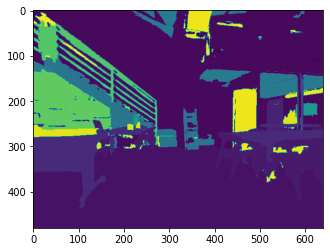

In [32]:
semantic_map = np.load('/scratch/shantanu/habitat_data/HabitatTrain/ZMojNkEp431/0/left_semantic/0.npy')
plt.imshow(semantic_map)

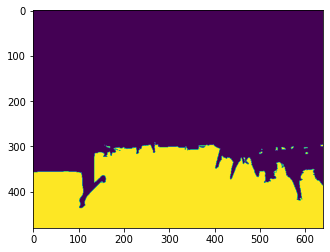

In [33]:
plt.imshow(semantic_map==2)